In [45]:
import h2o
import pandas as pd
import numpy as np
from h2o.grid.grid_search import H2OGridSearch
%matplotlib inline

In [46]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,1 day 0 hours 53 mins
H2O cluster timezone:,Europe/Moscow
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.8
H2O cluster version age:,10 months !!!
H2O cluster name:,H2O_from_python_1_jfue49
H2O cluster total nodes:,1
H2O cluster free memory:,1.624 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [47]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [48]:
h2o_df = h2o.import_file("https://raw.githubusercontent.com/MindSetLib/PythonUsefull/master/Insurance/GLMInsurance/freMTPL2freq.csv", sep = ',')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [49]:
df = pd.read_csv("https://raw.githubusercontent.com/MindSetLib/PythonUsefull/master/Insurance/GLMInsurance/freMTPL2freq.csv", sep = ',')

In [51]:
df.describe()

,Unnamed: 0,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density
count,678013.000000,6.780130e+05,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000
mean,339007.000000,2.621857e+06,0.053247,0.528750,6.454631,7.044265,45.499122,59.761502,1792.422405
std,195725.638368,1.641783e+06,0.240117,0.364442,2.050906,5.666232,14.137444,15.636658,3958.646564
min,1.000000,1.000000e+00,0.000000,0.002732,4.000000,0.000000,18.000000,50.000000,1.000000
25%,169504.000000,1.157951e+06,0.000000,0.180000,5.000000,2.000000,34.000000,50.000000,92.000000
50%,339007.000000,2.272152e+06,0.000000,0.490000,6.000000,6.000000,44.000000,50.000000,393.000000
75%,508510.000000,4.046274e+06,0.000000,0.990000,7.000000,11.000000,55.000000,64.000000,1658.000000
max,678013.000000,6.114330e+06,16.000000,2.010000,15.000000,100.000000,100.000000,230.000000,27000.000000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678013 entries, 0 to 678012
Data columns (total 13 columns):
Unnamed: 0    678013 non-null int64
IDpol         678013 non-null float64
ClaimNb       678013 non-null int64
Exposure      678013 non-null float64
Area          678013 non-null object
VehPower      678013 non-null int64
VehAge        678013 non-null int64
DrivAge       678013 non-null int64
BonusMalus    678013 non-null int64
VehBrand      678013 non-null object
VehGas        678013 non-null object
Density       678013 non-null int64
Region        678013 non-null object
dtypes: float64(2), int64(7), object(4)
memory usage: 67.2+ MB


In [53]:
df=df.drop(['Unnamed: 0'],axis=1)

In [54]:
df.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,1.0,1,0.10,D,5,0,55,50,B12,Regular,1217,R82
1,3.0,1,0.77,D,5,0,55,50,B12,Regular,1217,R82
2,5.0,1,0.75,B,6,2,52,50,B12,Diesel,54,R22
3,10.0,1,0.09,B,7,0,46,50,B12,Diesel,76,R72
4,11.0,1,0.84,B,7,0,46,50,B12,Diesel,76,R72


In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['Area'])

LabelEncoder()

In [56]:
df['AreaNum']=le.transform(df['Area'])

In [57]:
le.fit(df['VehBrand'])
df['VehBrandNum']=le.transform(df['VehBrand'])
le.fit(df['VehGas'])
df['VehGasNum']=le.transform(df['VehGas'])
le.fit(df['Region'])
df['RegionNum']=le.transform(df['Region'])

In [58]:
df.head()

,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,AreaNum,VehBrandNum,VehGasNum,RegionNum
0,1.0,1,0.10,D,5,0,55,50,B12,Regular,1217,R82,3,3,1,17
1,3.0,1,0.77,D,5,0,55,50,B12,Regular,1217,R82,3,3,1,17
2,5.0,1,0.75,B,6,2,52,50,B12,Diesel,54,R22,1,3,0,2
3,10.0,1,0.09,B,7,0,46,50,B12,Diesel,76,R72,1,3,0,14
4,11.0,1,0.84,B,7,0,46,50,B12,Diesel,76,R72,1,3,0,14


In [59]:
y=df['ClaimNb']
train_data=df.drop(['IDpol','Area','VehBrand','VehGas','Region'],axis=1)

In [60]:
type(train_data)

pandas.core.frame.DataFrame

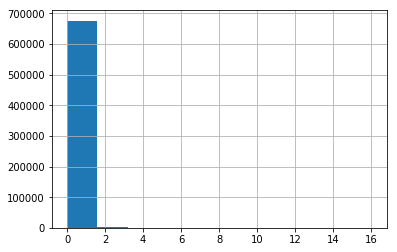

In [61]:
df['ClaimNb'].hist(bins=10)

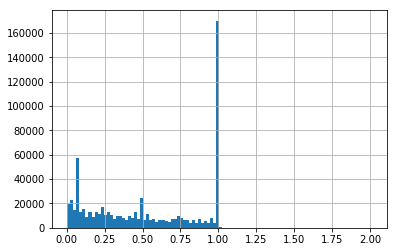

In [62]:
df['Exposure'].hist(bins=100 )

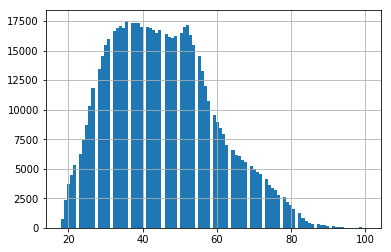

In [63]:
df['DrivAge'].hist(bins=100 )

In [ ]:
#df['VehBrand'].hist(bins=100 )

In [64]:
hf = h2o.H2OFrame(train_data)

C:\Users\1\Anaconda3\lib\site-packages\h2o\utils\shared_utils.py:170: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [65]:
hf.head()

ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,AreaNum,VehBrandNum,VehGasNum,RegionNum
1,0.1,5,0,55,50,1217,3,3,1,17
1,0.77,5,0,55,50,1217,3,3,1,17
1,0.75,6,2,52,50,54,1,3,0,2
1,0.09,7,0,46,50,76,1,3,0,14
1,0.84,7,0,46,50,76,1,3,0,14
1,0.52,6,2,38,50,3003,4,3,1,7
1,0.45,6,2,38,50,3003,4,3,1,7
1,0.27,7,0,33,68,137,2,3,0,19
1,0.71,7,0,33,68,137,2,3,0,19
1,0.15,7,0,41,50,60,1,3,0,11


In [66]:
#Split the data into Train/Test/Validation with Train having 70% and test and validation 15% each
train,test,valid = hf.split_frame(ratios=[.7, .15])

In [67]:
poisson_fit = H2OGeneralizedLinearEstimator(family = "poisson")

In [68]:
poisson_fit.train(y="ClaimNb", x = ["AreaNum", "VehPower", "VehAge", "DrivAge", "BonusMalus", "Density","VehBrandNum","VehGasNum","RegionNum"], 
                  training_frame = train, validation_frame = valid, weights_column = "Exposure")

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [69]:
predict = poisson_fit.predict(test)

glm prediction progress: |████████████████████████████████████████████████| 100%


In [28]:
type(predict)

h2o.frame.H2OFrame

In [29]:
predict.shape

(101973, 1)

In [70]:
predict

predict
0.0581898
0.0534007
0.108097
0.160116
0.0654647
0.0674058
0.0674058
0.0828909
0.0668254
0.0698778


In [38]:
h2o.export_file(test, 'test_h2o_f4.csv')

Export File progress: |███████████████████████████████████████████████████| 100%


In [39]:
h2o.export_file(predict, 'test_h2o_pred_f4.csv')

Export File progress: |███████████████████████████████████████████████████| 100%


In [71]:
print('Model Type:', poisson_fit.type)
#print('R2', poisson_fit.r2(valid = False))

print('RMSLE', poisson_fit.rmsle(valid = False))
print('RMSE', poisson_fit.rmse(valid = False))

print('RMSLE', poisson_fit.rmsle(test))
print('RMSE', poisson_fit.rmse(test))

Model Type: regressor
RMSLE 0.17382358979658782
RMSE 0.2613184411685584
RMSLE 0.17382358979658782
RMSE 0.2613184411685584


In [72]:
# Coefficients that can be applied to the non-standardized data.
print(poisson_fit.coef())

# Coefficients fitted on the standardized data (requires standardize = True, which is on by default)
print(poisson_fit.coef_norm())


{'Intercept': -4.664206879328439, 'DrivAge': 0.013521928685952415, 'VehBrandNum': 0.0037186073028643647, 'VehGasNum': -0.039441562643224196, 'VehAge': -0.02198107775723237, 'RegionNum': -0.004737559516488217, 'Density': -4.68726571478142e-06, 'VehPower': 0.013097204692686508, 'AreaNum': 0.03311593258202445, 'BonusMalus': 0.022577651594073052}
{'Intercept': -2.79424905538761, 'DrivAge': 0.19496189179416828, 'VehBrandNum': 0.011820003185349214, 'VehGasNum': -0.019697827243381035, 'VehAge': -0.12321086999457845, 'RegionNum': -0.03131913826580602, 'Density': -0.017499174056561626, 'VehPower': 0.02598659231708497, 'AreaNum': 0.045809226219316344, 'BonusMalus': 0.3208750658866475}


In [73]:
poisson_fit._model_json['output']['coefficients_table'].as_data_frame()

,names,coefficients,standardized_coefficients
0,Intercept,-4.664207,-2.794249
1,VehPower,0.013097,0.025987
2,VehAge,-0.021981,-0.123211
3,DrivAge,0.013522,0.194962
4,BonusMalus,0.022578,0.320875
5,Density,-0.000005,-0.017499
6,AreaNum,0.033116,0.045809
7,VehBrandNum,0.003719,0.011820
8,VehGasNum,-0.039442,-0.019698
9,RegionNum,-0.004738,-0.031319


In [ ]:
poisson_fit._model_json?

In [ ]:
poisson_fit.rmsle?

In [ ]:
sh = poisson_fit.score_history()

In [ ]:
sh

In [ ]:
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch

h2o.init()
# Import a sample binary outcome dataset into H2O
data = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_train_10k.csv")
test = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_test_5k.csv")

# Identify predictors and response
x = data.columns
y = "response"
x.remove(y)

# For binary classification, response should be a factor
data[y] = data[y].asfactor()
test[y] = test[y].asfactor()

# Split data into train & validation
ss = data.split_frame(seed = 1)
train = ss[0]
valid = ss[1]

# GBM hyperparameters
gbm_params1 = {'learn_rate': [0.01, 0.1],
                'max_depth': [3, 5, 9],
                'sample_rate': [0.8, 1.0],
                'col_sample_rate': [0.2, 0.5, 1.0]}

# Train and validate a cartesian grid of GBMs
gbm_grid1 = H2OGridSearch(model=H2OGradientBoostingEstimator,
                          grid_id='gbm_grid1',
                          hyper_params=gbm_params1)
gbm_grid1.train(x=x, y=y,
                training_frame=train,
                validation_frame=valid,
                ntrees=100,
                seed=1)

# Get the grid results, sorted by validation AUC
gbm_gridperf1 = gbm_grid1.get_grid(sort_by='auc', decreasing=True)
gbm_gridperf1

# Grab the top GBM model, chosen by validation AUC
best_gbm1 = gbm_gridperf1.models[0]

# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
best_gbm_perf1 = best_gbm1.model_performance(test)

best_gbm_perf1.auc()  # 0.7781932261061573


In [ ]:
from h2o.automl import H2OAutoML

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
# plot training logloss and auc
sh.plot(x='number_of_trees', y = ['training_auc', 'training_logloss'])

In [ ]:
import os
import pandas as pd

import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri    
from rpy2.robjects.packages import importr
